In [1]:
import time
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib import colormaps as cm
from package import saveload

In [2]:
figsize=(12, 4)

In [3]:
def calculate_mean_betty(df: pd.DataFrame, array, dim=None):
    """
    Calculate mean betty numbers
    
    Parameters:
    -----------
    df : DataFrame with columns ['Birth', 'Death', 'Dimension', 'Space']
    
    array : list or np.array
        Array of values
        
    dim : int or None
        Dimension of topological space
        If that's None< that will be maximal dimension from dfs['Dimension']
    
    Returns:
    --------
    res : np.array shape (len(array), dim)
        Array of 
    """
    if dim is None:
        dim = df['Dimension'].max()
    res = np.zeros([len(array), dim])
    for i in range(len(array)):
        val = array[i]
        dfi = df[(df['Birth'] <= val)&(df['Death'] > val)]
        dfi = dfi.groupby(['Space', 'Dimension'], as_index=False).count()[['Space', 'Dimension', 'Birth']]
        dfi = dfi.groupby('Dimension', as_index=False).mean()
        index = dfi['Dimension'].values
        vals = dfi['Birth'].values
        res[i, index] = vals
    return res

In [4]:
def calculate_mean_EC(df: pd.DataFrame, array):
    """
    Calculate mean betty numbers
    
    Parameters:
    -----------
    df : DataFrame with columns ['Birth', 'Death', 'Dimension', 'Space']
    
    array : list or np.array
        Array of values
        
    
    Returns:
    --------
    res : np.array length len(array)
        Array of 
    """
    res = np.zeros(len(array))
    for i in range(len(array)):
        val = array[i]
        dfi = df[(df['Birth'] <= val)&(df['Death'] > val)][['Space', 'Dimension', 'Birth']]
        dfi = dfi.groupby(['Space', 'Dimension'], as_index=False).count()
        dfi.columns = ['Space', 'Dimension', 'Count']
        dfi['Summand EC'] = (-1)**dfi['Dimension'] * dfi['Count']
        dfi = dfi.groupby('Space', as_index=False).sum()['Summand EC']
        res[i] = dfi.mean()
    res[np.isnan(res)] = 0
    return res

# Hexogonal case $PVLM(A_2)$

$A_2 \equiv A_2^*$, but $A_2 \neq A_2^*$

In [5]:
filename_A2 = 'lab-results/lab_hexagonal_tessellation_on_torus2d_modern_aggregated/size{0}.csv'
sizes_A2 = np.arange(3, 129)

dfs_A2 = [pd.read_csv(filename_A2.format(size)) for size in sizes_A2]
dfs_A2 = [df[df['Death'] == np.inf][['Birth', 'Dimension', 'Space']] for df in dfs_A2]
for i in range(len(sizes_A2)):
    dfs_A2[i]['Size'] = sizes_A2[i]
df_A2 = pd.concat(dfs_A2)
df_A2['Number'] = np.tile(np.arange(3), len(df_A2)//3)
df_A2 = df_A2[df_A2['Number'] > 0]

In [6]:
df_A2mean = df_A2.groupby(['Size', 'Number'], as_index=False).mean()
df_A2mean.head()

,Size,Number,Birth,Dimension,Space
0,3,1,0.445161,1.0,49.5
1,3,2,0.581356,1.0,49.5
2,4,1,0.431938,1.0,49.5
3,4,2,0.561923,1.0,49.5
4,5,1,0.431530,1.0,49.5


In [7]:
xticks_A2 = np.arange(3, 129, 12.5) // 1


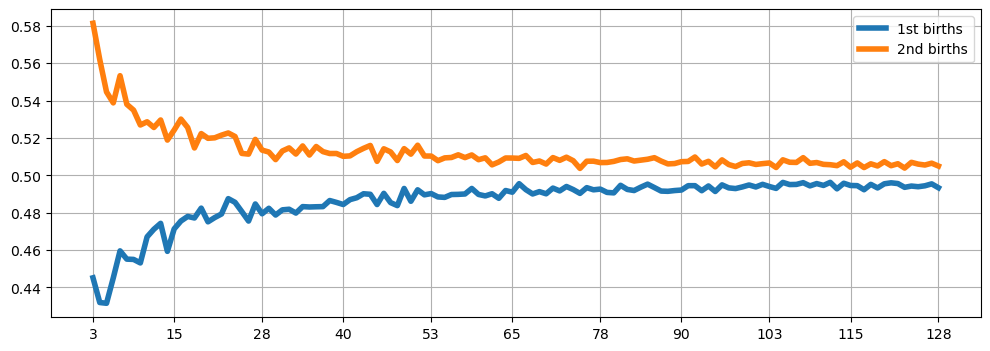

In [8]:
births1_A2 = df_A2mean[df_A2mean['Number'] == 1]['Birth']
births2_A2 = df_A2mean[df_A2mean['Number'] == 2]['Birth']

plt.figure(figsize=figsize)
plt.plot(sizes_A2, births1_A2, linewidth=4, label='1st births')
plt.plot(sizes_A2, births2_A2, linewidth=4, label='2nd births')
plt.legend()
plt.xticks(xticks_A2)
plt.grid(True)
plt.show()

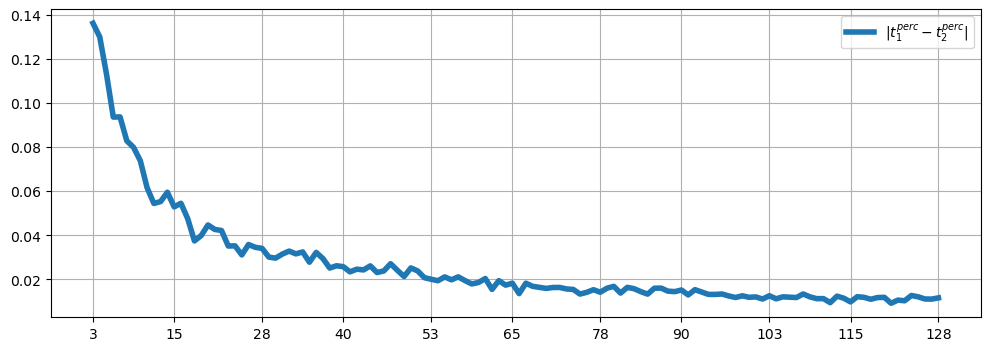

In [9]:
plt.figure(figsize=figsize)
plt.plot(sizes_A2, abs(births1_A2.values - births2_A2.values), linewidth=4, label='$|t_1^{perc} - t_2^{perc}|$')
plt.legend()
plt.xticks(xticks_A2)
plt.grid(True)
plt.show()

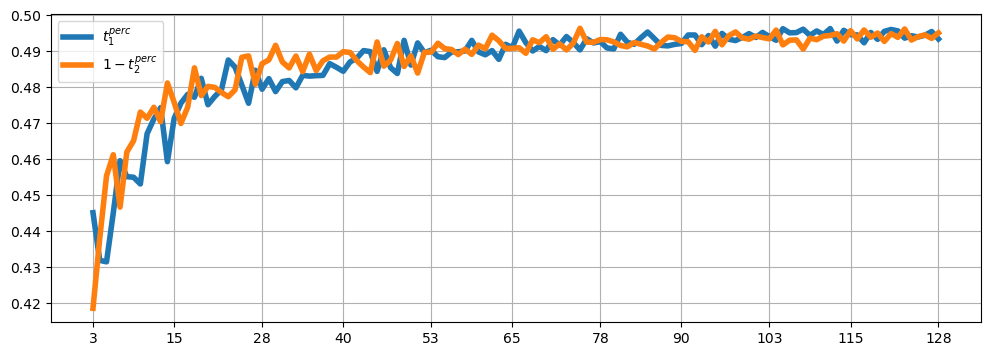

In [10]:
plt.figure(figsize=figsize)
plt.plot(sizes_A2, births1_A2.values, linewidth=4, label='$t_1^{perc}$')
plt.plot(sizes_A2, 1 - births2_A2.values, linewidth=4, label='$1 - t_2^{perc}$')
plt.legend()
plt.xticks(xticks_A2)
plt.grid(True)
plt.show()

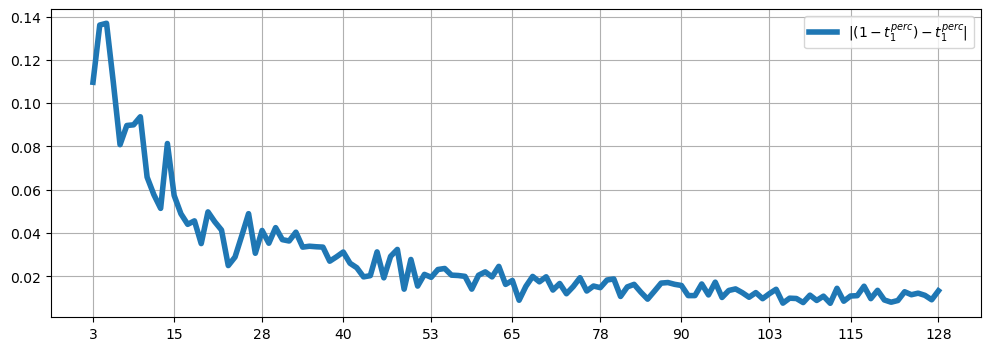

In [11]:
plt.figure(figsize=figsize)
plt.plot(sizes_A2, abs((1 - births1_A2.values) - births1_A2.values), linewidth=4, label='$|(1 - t_1^{perc}) - t_1^{perc}|$')
plt.legend()
plt.xticks(xticks_A2)
plt.grid(True)
plt.savefig('LaTeX/pics/difference_dual_limits_A2.png')

# The case of dula lattice $A_3\equiv\text{fcc}$ and $A_3^*\equiv\text{bcc}$

In [12]:
sizes_fcc = np.arange(3, 28)
experiments_fcc = 100
filename_fcc = 'lab-results/lab_voronoiD3_tessellation_on_torus3d_aggregated/size{0}.csv'
clock = time.perf_counter()
dfs_fcc = [pd.read_csv(filename_fcc.format(size)) for size in sizes_fcc]
print('Loaded in {0: .4f} seconds.'.format(time.perf_counter() - clock))
for i in range(len(sizes_fcc)):
    dfs_fcc[i]['Size'] = sizes_fcc[i]
df_fcc = [i[i['Death'] == np.inf] for i in dfs_fcc]
df_fcc = pd.concat(df_fcc)
df_fcc['Number'] = np.tile(np.arange(7), len(df_fcc)//7)
df_fcc.head(16)

Loaded in  4.5266 seconds.


,Birth,Death,Dimension,Space,Size,Number
36,0.020843,inf,0,0,3,0
37,0.171396,inf,1,0,3,1
38,0.237221,inf,1,0,3,2
39,0.311590,inf,1,0,3,3
40,0.807967,inf,2,0,3,4
41,0.853646,inf,2,0,3,5
42,0.914665,inf,2,0,3,6
78,0.004738,inf,0,1,3,0
79,0.119677,inf,1,1,3,1
80,0.137319,inf,1,1,3,2


In [13]:
sizes_bcc = np.arange(3, 32)
experiments_bcc = 100
filename_bcc = 'lab-results/lab_voronoiBCC_tessellation_on_torus3d_aggregated/size{0}.csv'
clock = time.perf_counter()
dfs_bcc = [pd.read_csv(filename_bcc.format(size)) for size in sizes_bcc]
print('Loaded in {0: .4f} seconds.'.format(time.perf_counter() - clock))
for i in range(len(sizes_bcc)):
    dfs_bcc[i]['Size'] = sizes_bcc[i]
df_bcc = [i[i['Death'] == np.inf] for i in dfs_bcc]
df_bcc = pd.concat(df_bcc)
df_bcc['Number'] = np.tile(np.arange(7), len(df_bcc)//7)
df_bcc.head(16)

Loaded in  3.4493 seconds.


,Birth,Death,Dimension,Space,Size,Number
15,0.009706,inf,0,0,3,0
16,0.281725,inf,1,0,3,1
17,0.329672,inf,1,0,3,2
18,0.334236,inf,1,0,3,3
19,0.704259,inf,2,0,3,4
20,0.806925,inf,2,0,3,5
21,0.844575,inf,2,0,3,6
36,0.014220,inf,0,1,3,0
37,0.243343,inf,1,1,3,1
38,0.284921,inf,1,1,3,2


In [14]:
df_fccmean = df_fcc.groupby(['Size', 'Number'], as_index=False).mean()
df_fccmean.head(8)

,Size,Number,Birth,Death,Dimension,Space
0,3,0,0.009795,NaN,0.0,49.5
1,3,1,0.137855,NaN,1.0,49.5
2,3,2,0.178054,NaN,1.0,49.5
3,3,3,0.214924,NaN,1.0,49.5
4,3,4,0.708864,NaN,2.0,49.5
5,3,5,0.754458,NaN,2.0,49.5
6,3,6,0.793629,NaN,2.0,49.5
7,4,0,0.003541,NaN,0.0,49.5


In [15]:
df_bccmean = df_bcc.groupby(['Size', 'Number'], as_index=False).mean()
df_bccmean.head(8)

,Size,Number,Birth,Death,Dimension,Space
0,3,0,0.017970,NaN,0.0,49.5
1,3,1,0.177030,NaN,1.0,49.5
2,3,2,0.231414,NaN,1.0,49.5
3,3,3,0.285450,NaN,1.0,49.5
4,3,4,0.694129,NaN,2.0,49.5
5,3,5,0.747496,NaN,2.0,49.5
6,3,6,0.803055,NaN,2.0,49.5
7,4,0,0.007944,NaN,0.0,49.5


In [16]:
if len(sizes_fcc) < len(sizes_bcc):
    sizes_fccbcc = sizes_fcc
else:
    sizes_fccbcc = sizes_bcc

In [17]:
t1_fcc = df_fccmean[df_fccmean['Number'] == 1]['Birth'].values[:len(sizes_fccbcc)]
t2_fcc = df_fccmean[df_fccmean['Number'] == 4]['Birth'].values[:len(sizes_fccbcc)]

In [18]:
t1_bcc = df_bccmean[df_bccmean['Number'] == 1]['Birth'].values[:len(sizes_fccbcc)]
t2_bcc = df_bccmean[df_bccmean['Number'] == 4]['Birth'].values[:len(sizes_fccbcc)]

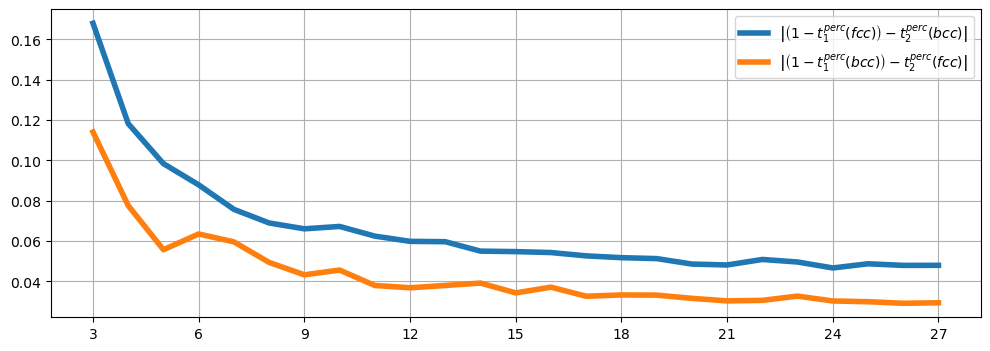

In [19]:
plt.figure(figsize=figsize)

plt.plot(sizes_fccbcc, abs((1 - t1_fcc) - t2_bcc), linewidth=4, label='$\\left|\\left(1 - t_1^{perc}(fcc)\\right) - t_2^{perc}(bcc)\\right|$')
plt.plot(sizes_fccbcc, abs((1 - t1_bcc) - t2_fcc), linewidth=4, label='$\\left|\\left(1 - t_1^{perc}(bcc)\\right) - t_2^{perc}(fcc)\\right|$')

plt.legend()
plt.xticks(np.arange(3, 28, 3))
plt.grid(True)
plt.savefig('LaTeX/pics/difference_dual_limits_fcc_bcc.png')